In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

RESULTS_DIR = '/home/bryce/Projects/Data_Science/Apt_Prices/csvs/march8/'

In [62]:
train_df = pd.read_csv(RESULTS_DIR + 'train_nn_results.csv', sep=';')
test_df = pd.read_csv(RESULTS_DIR + 'test_nn_results.csv', sep=';')

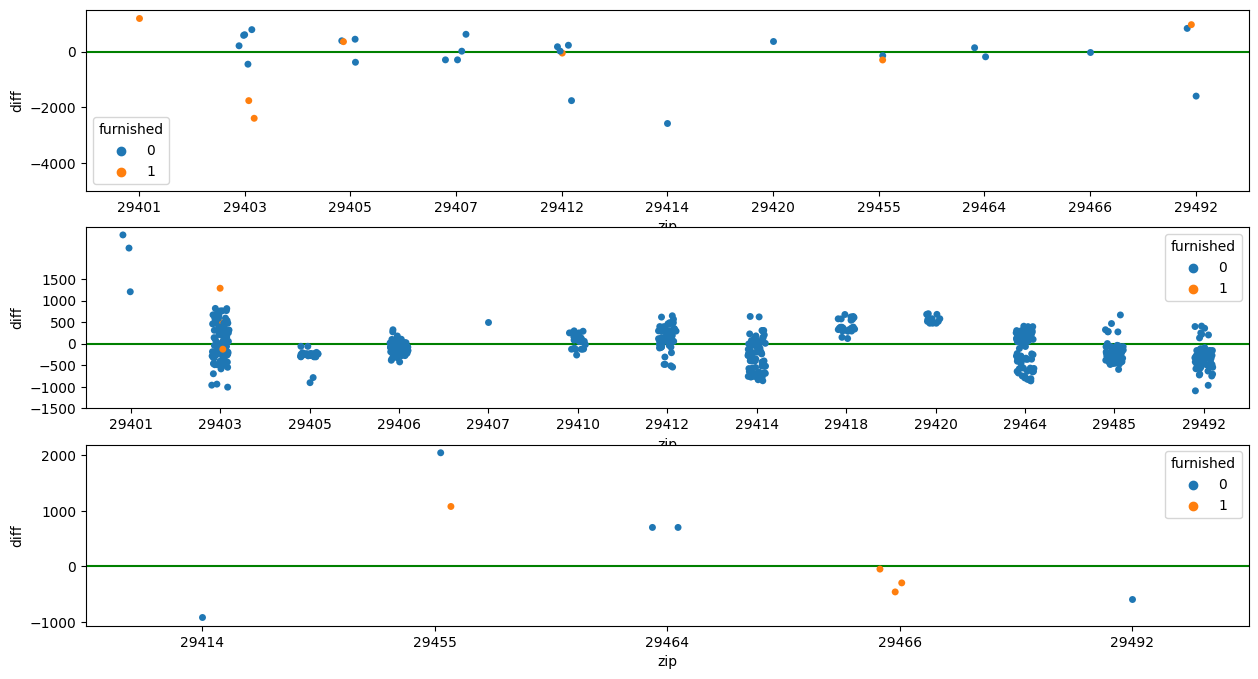

In [67]:
fig, axs = plt.subplots(3, figsize=(15, 8))
house = test_df.loc[test_df.property_type == 'house']
undefined = test_df.loc[test_df.property_type == 'undefined']
condo_and_townhouse = test_df.loc[(test_df.property_type == 'condo') | (test_df.property_type == 'townhouse')]

house_ax = axs[0]
apt_ax = axs[1]
condo_ax = axs[2]


sns.stripplot(house, x='zip', y='diff', ax=axs[0], hue='furnished')
sns.stripplot(undefined, x='zip', y='diff', ax=axs[1], hue='furnished')
sns.stripplot(condo_and_townhouse, x='zip', y='diff', ax=axs[2], hue='furnished')

house_ax.set_ylim(-5000, 1500)
house_ax.axhline(0, color='g')
apt_ax.set_yticks(np.arange(-1500, 2000, 500))
apt_ax.axhline(0, color='g')
condo_ax.axhline(0, color='g')

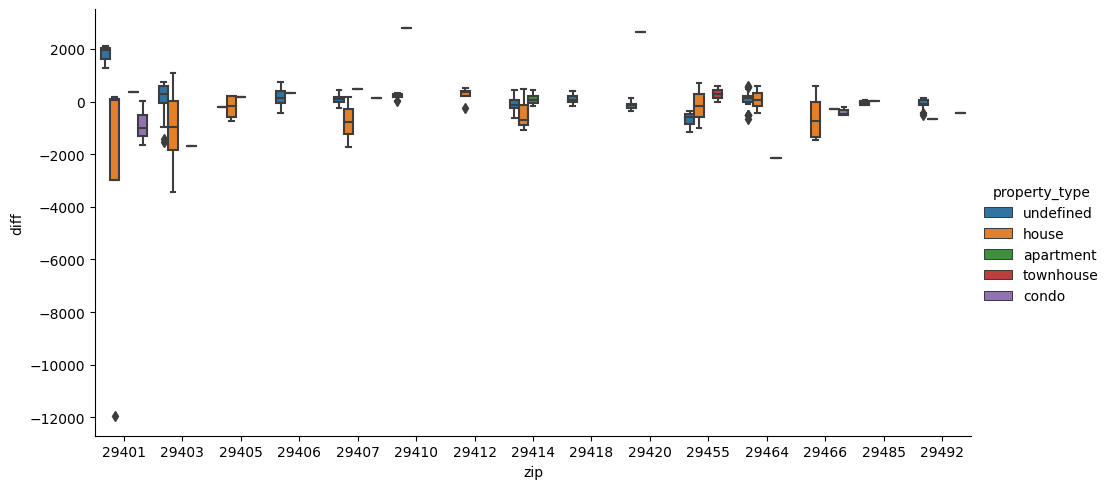

In [43]:
sns.catplot(test_df, x='zip', y='diff', hue='property_type', kind='box', aspect=2)

In [79]:
one_brs = test_df.loc[(test_df.property_type == 'undefined') & (test_df.beds == 1)]

diffs_by_zip = one_brs.groupby(['zip'])['diff'].describe().sort_values(by='count', ascending=False)
diffs_by_zip

,count,mean,std,min,25%,50%,75%,max
zip,,,,,,,,
29403,45.0,-81.153714,354.263969,-698.355957,-417.861938,-186.502930,299.373535,480.557373
29406,30.0,-79.742542,122.205303,-352.360474,-150.330811,-79.680908,-18.460480,322.654419
29464,30.0,61.974581,200.089777,-464.836792,7.814575,81.275635,197.972778,393.397827
29414,29.0,-325.533805,338.417382,-808.576172,-669.793335,-396.614014,5.378174,151.306885
29492,20.0,-297.223419,243.401828,-704.489258,-443.185181,-306.935425,-160.489258,249.564819
29405,15.0,-248.265780,161.385777,-786.695068,-243.195068,-231.597900,-221.146484,-61.808594
29412,15.0,144.026335,201.437210,-309.491943,25.297791,168.392578,319.928040,396.517090
29410,12.0,134.496216,67.883363,49.078735,98.495239,130.975586,151.643829,297.366821
29485,8.0,-114.966949,273.990035,-421.929932,-250.679932,-184.926208,-27.922485,466.751587


Here is my plan. Let's first focus on improving the accuracy for apartment complexes. We'll restrict ourselves to 1br apts.

Let's find two zip codes that have a similar number of 1brs, similar price, but for which the predictions are differents. Say in ZC1 yhat is mostly negative, and ZC2 yhat is closer to 0 or positive.

Should check out sq ft.

But main difference is the bullets.
- Does one zip code have more or less bullets on average?
- Should we normalize the bullets dummy -- so instead of a column (1, 1, 0, 0, 1), it would be (1/sqrt(5), 1/sqrt(5), 0, 0, 1/sqrt(5))?
- We could look at diff per word. For every time a word is in bullets, what is the diff? Do some words have a high diff?
- Suppose this leads to us recognizing some important bullets. How could this lead to feature generation? We should think about correlation again, and double check that one function we used.

<AxesSubplot: xlabel='sq_ft', ylabel='y'>

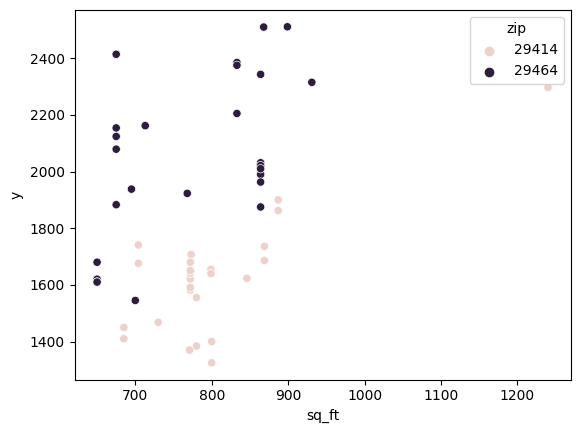

In [85]:
zips_subset = [29464, 29414]
one_brs_subset = one_brs.loc[one_brs.zip.isin(zips_subset)]
sns.scatterplot(one_brs_subset, x='sq_ft', y='y', hue='zip')

In [ ]:
fig, ax = plt.subplots()
scatter = plt.scatter(
    x = one_brs_subset.sq_ft,
    y = one_brs_subset.y,
    color
)